<a href="https://colab.research.google.com/github/lorenzomazzante/ML01/blob/main/TD9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD - Arbres de décisions et Random Forrest

Réalisé par Cyprien Gilet et Khaled Belahcene

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

# 1. Arbre de décision par Scikit-Learn sur base de données Diabete_UCI

Dans cette section nous souhaitons prendre en main la calibration d'arbres de décision proposés par Scikit-Learn sur la base de données Diabete_UCI. Concernant cette base de données, l'objectif est de diagnostiquer la variable d'intérêt diabète.
Le code ci-dessous permet d'importer la base de données Diabete_UCI.

In [7]:
df = pd.read_csv('diabetes_UCI.csv')
print(df.columns.values)
print('df =', df)
print('df_Info =', df.info())

df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

Xdf = df.copy()
Xdf.drop(['Outcome'], axis='columns', inplace=True)

K = int(np.max(YR))
X = np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

In [8]:
run Performances_classifieur.ipynb

**Question 1.1.** Diviser aléatoirement la base de données en une base d'apprentissage et une base de test :

- La base d'apprentissage contiendra $n=500$ observations (patients).
- La base de test contiendra les observations (patients) restants (soit 268).

In [5]:
# RÉPONSE À LA QUESTION 1.1:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,YR, train_size=500, random_state=15, shuffle=True)

**Question 1.2.** À partir de la base d'apprentissage calibrer un arbre de décision en appliquant la fonction proposée par Scikit-Learn. Pour cette question, nous ne donnerons pas de spécifications concernant la profondeur de l'arbre.

- Quelle est le nombre total de feuilles terminales dans l'arbre de décision ?
- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?
- Afficher la structure de cette arbre calibré sur la base d'apprentissage.


number of leaves:  103
accuracy globale sur la base d apprentissage: 1.0
accuracy globale sur la base de test: 0.6791044776119403


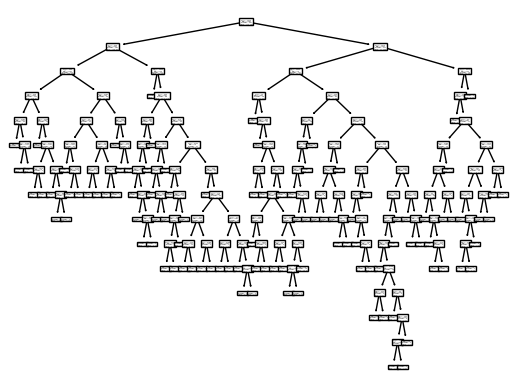

In [16]:
# RÉPONSE À LA QUESTION 1.2:
model = tree.DecisionTreeClassifier(random_state=0).fit(Xtrain, Ytrain)

print('number of leaves: ',model.get_n_leaves());

Yhattrain = model.predict(Xtrain)
Yhattest = model.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(model);

**Question 1.3.** À partir de la base d'apprentissage calibrer un arbre de décision en appliquant la fonction proposée par Scikit-Learn. Pour cette question, nous souhaitons obentenir 10 observations minimum par feuille terminale.

- Quelle est le nombre total de feuilles terminales dans l'arbre de décision ?
- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?

Refaire la même procédure avec 40 puis 100 observations minimum par feuille terminale. Que peut-on constater ?


number of leaves:  31
accuracy globale sur la base d apprentissage: 0.846
accuracy globale sur la base de test: 0.7649253731343284


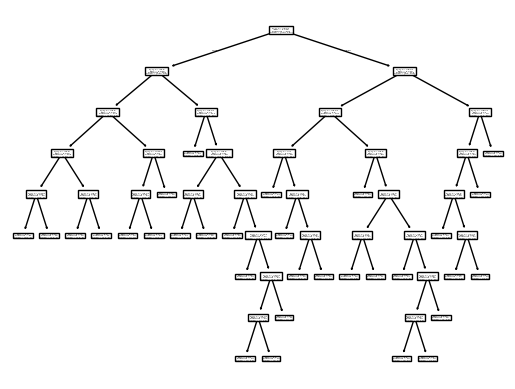

In [19]:
# RÉPONSE À LA QUESTION 1.3:
model2 = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=10).fit(Xtrain, Ytrain)

print('number of leaves: ',model2.get_n_leaves());

Yhattrain = model2.predict(Xtrain)
Yhattest = model2.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(model2);


number of leaves:  10
accuracy globale sur la base d apprentissage: 0.786
accuracy globale sur la base de test: 0.7686567164179104


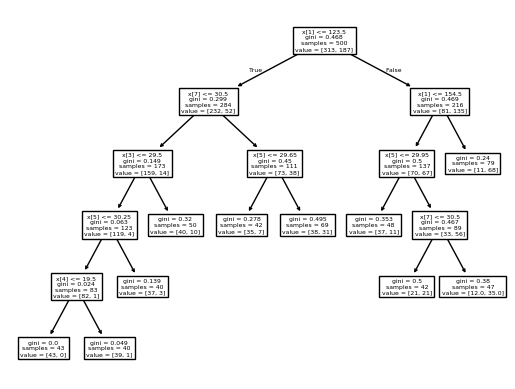

In [20]:
model3 = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=40).fit(Xtrain, Ytrain)

print('number of leaves: ',model3.get_n_leaves());

Yhattrain = model3.predict(Xtrain)
Yhattest = model3.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(model3);

number of leaves:  4
accuracy globale sur la base d apprentissage: 0.742
accuracy globale sur la base de test: 0.7611940298507462


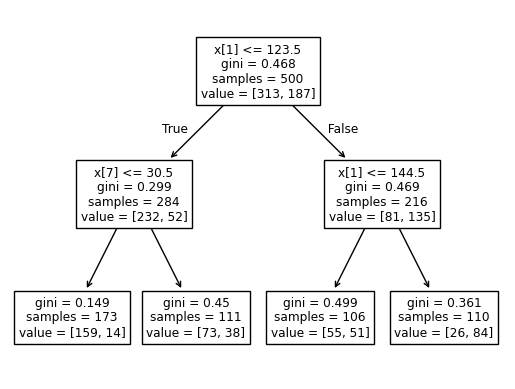

In [22]:
model4 = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=100).fit(Xtrain, Ytrain)

print('number of leaves: ',model4.get_n_leaves());

Yhattrain = model4.predict(Xtrain)
Yhattest = model4.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(model4);

**Question 1.4.** À partir de la base d'apprentissage calibrer un arbre de décision en appliquant la fonction proposée par Scikit-Learn. Pour cette question, nous souhaitons obentenir maximum 30 feuilles terminales dans l'arbre complet.

- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?

Refaire la même procédure avec 10 puis 5 feuilles terminales dans l'arbre complet. Que peut-on constater ?


number of leaves:  30
accuracy globale sur la base d apprentissage: 0.884
accuracy globale sur la base de test: 0.7350746268656716


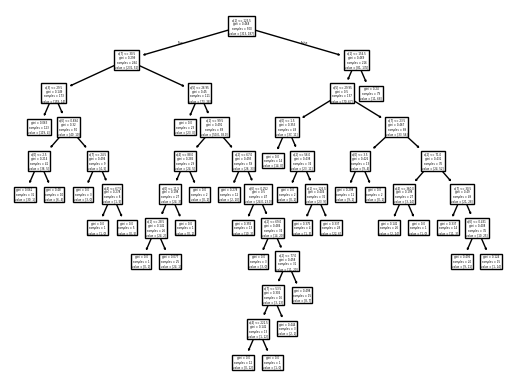

In [24]:
# RÉPONSE À LA QUESTION 1.4:
model5 = tree.DecisionTreeClassifier(random_state=0,max_leaf_nodes=30).fit(Xtrain, Ytrain)

print('number of leaves: ',model5.get_n_leaves());

Yhattrain = model5.predict(Xtrain)
Yhattest = model5.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(model5);


number of leaves:  10
accuracy globale sur la base d apprentissage: 0.826
accuracy globale sur la base de test: 0.7388059701492538


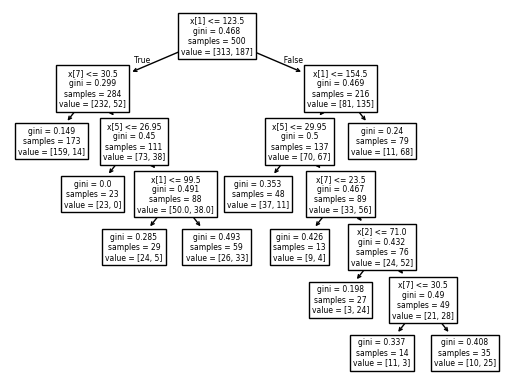

In [25]:
model6 = tree.DecisionTreeClassifier(random_state=0,max_leaf_nodes=10).fit(Xtrain, Ytrain)

print('number of leaves: ',model6.get_n_leaves());

Yhattrain = model6.predict(Xtrain)
Yhattest = model6.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(model6);

number of leaves:  5
accuracy globale sur la base d apprentissage: 0.786
accuracy globale sur la base de test: 0.7350746268656716


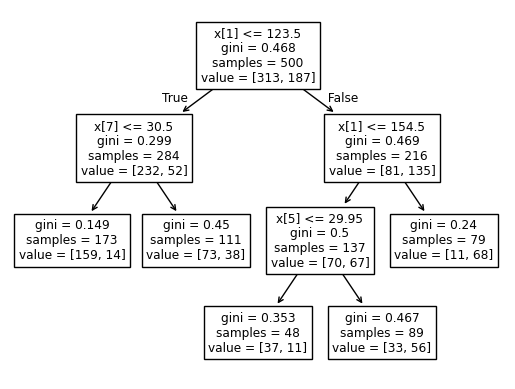

In [23]:
model7 = tree.DecisionTreeClassifier(random_state=0,max_leaf_nodes=5).fit(Xtrain, Ytrain)

print('number of leaves: ',model7.get_n_leaves());

Yhattrain = model7.predict(Xtrain)
Yhattest = model7.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(model7);

**Question 1.5.** Dans cette question nous souhaitons élaguer l'arbre de sorte qu'il se généralise bien sur la base de validation. Pour cela nous souhaitons nous référer au Coût-Complexité.

- En regardant les tutoriels proposés par Scikit-Learn, proposer un code permettant de réaliser cet objectif.
- Afficher la nouvelle structure de cet arbre élagué.


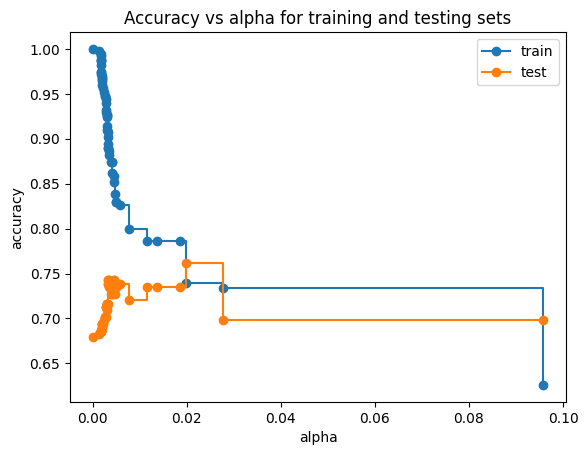

In [26]:
# RÉPONSE À LA QUESTION 1.5:
model = tree.DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

models = []
for ccp_alpha in ccp_alphas:
    model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(Xtrain, Ytrain)
    models.append(model)

train_scores = [model.score(Xtrain, Ytrain) for model in models]
test_scores = [model.score(Xtest, Ytest) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We get the best value with alpha = 0.02

number of leaves:  3
accuracy globale sur la base d apprentissage: 0.74
accuracy globale sur la base de test: 0.7611940298507462


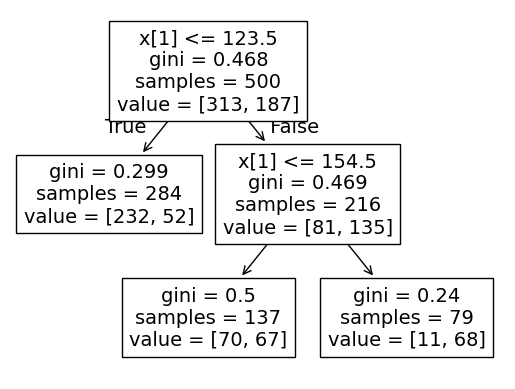

In [27]:
modelElaguer = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.02).fit(Xtrain, Ytrain)

print('number of leaves: ',modelElaguer.get_n_leaves());

Yhattrain = modelElaguer.predict(Xtrain)
Yhattest = modelElaguer.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

tree.plot_tree(modelElaguer);

# 2. Validation Croisée : Random Forest versus Régression Logistique

Dans cette section nous souhaitons comparer les classifieurs Random Forest, Régression Logistique la base de données Diabete_UCI à partir d'une validation croisée de 10 folds.

**Question 2.1.** Implémenter le code permettant de qualibrer tous ces classifieurs dans une validation croisée et comparer les taux d'erreurs globaux de chaque classifieur.
- Lequel est en moyenne le plus performant sur les bases de validations ?
- Afficher sur une même figure les dispersions des résultats (training versus validation) pour chaque classifieur.

In [28]:
# RÉPONSE À LA QUESTION 2.1 :

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model = model.fit(Xtrain, Ytrain)

Yhattrain = model.predict(Xtrain)
Yhattest = model.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

accuracy globale sur la base d apprentissage: 0.988
accuracy globale sur la base de test: 0.7350746268656716


In [29]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(random_state=0).fit(Xtrain, Ytrain)

Yhattrain = model.predict(Xtrain)
Yhattest = model.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

accuracy globale sur la base d apprentissage: 0.776
accuracy globale sur la base de test: 0.7574626865671642


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
